In [51]:
!pip install pyproj -q
import pandas as pd
from datetime import datetime

print(f"Librerias instaladas ! ! !")

Librerias instaladas ! ! !


In [52]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [53]:
#Se formatean los datos de fecha

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT


In [54]:
columnas_deseadas = ['latitud', 'longitud']
df2 = df[columnas_deseadas].copy()
df2

,latitud,longitud
0,7.076011,-73.102501
1,7.079495,-73.105400
2,7.090290,-73.091003
3,7.067435,-73.090958
4,7.066905,-73.104980
...,...,...
1257,7.072610,-73.099487
1258,7.065252,-73.103607
1259,7.091391,-73.103264
1260,7.061083,-73.097000


In [55]:
# Valor máximo por columna
maximos = df2.max()

# Valor mínimo por columna
minimos = df2.min()

# Promedio por columna
promedio = df2.mean()

print("Valores máximos por columna:")
print(maximos)

print("\nValores mínimos por columna:")
print(minimos)

print("\nPromedio por columna:")
print(promedio)

Valores máximos por columna:
latitud      7.098318
longitud   -73.077385
dtype: float64

Valores mínimos por columna:
latitud      7.057170
longitud   -73.116966
dtype: float64

Promedio por columna:
latitud      7.077645
longitud   -73.095294
dtype: float64


In [56]:
df2.dtypes

latitud     float64
longitud    float64
dtype: object

In [57]:
import pyproj

#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)
df2['x'], df2['y'] = P(df2['longitud'], df2['latitud'])
df2

,latitud,longitud,x,y
0,7.076011,-73.102501,709584.027559,782579.281866
1,7.079495,-73.105400,709262.121378,782963.354103
2,7.090290,-73.091003,710847.924654,784163.825097
3,7.067435,-73.090958,710863.366771,781635.895608
4,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...
1257,7.072610,-73.099487,709918.546763,782204.438977
1258,7.065252,-73.103607,709466.644754,781388.734012
1259,7.091391,-73.103264,709492.782783,784279.996264
1260,7.061083,-73.097000,710198.574916,780930.648555


Número de columnas: 437
Número de filas: 454
Resolución: 10 metros


<ipython-input-59-e3e071c173b4>:25: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([df2['x'], df2['y']])


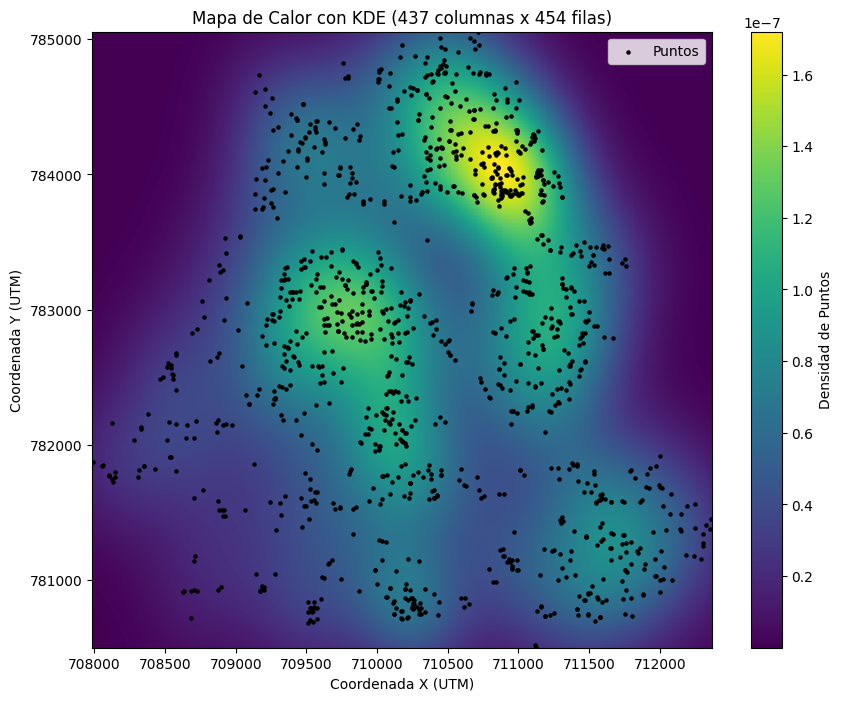

In [59]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Coordenadas UTM mínimas y máximas en los ejes X e Y
xmin = df2['x'].min()
xmax = df2['x'].max()
ymin = df2['y'].min()
ymax = df2['y'].max()

# Resolución deseada en metros
res = 10  # 10 metros en este caso

# Calcula el número de columnas y filas
cols = int((xmax - xmin) / res)
rows = int((ymax - ymin) / res)

print("Número de columnas:", cols)
print("Número de filas:", rows)
print("Resolución:", res, "metros")

# Calcular el KDE
k = kde.gaussian_kde([df2['x'], df2['y']])
xi, yi = np.mgrid[xmin:xmax:cols * 1j, ymin:ymax:rows * 1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar(label='Densidad de Puntos')
plt.scatter(df2['x'], df2['y'], s=5, c='k', label='Puntos')
plt.xlabel('Coordenada X (UTM)')
plt.ylabel('Coordenada Y (UTM)')
plt.title(f'Mapa de Calor con KDE ({cols} columnas x {rows} filas)')
plt.legend()
plt.show()


<ipython-input-66-a9f92970f344>:21: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([df2['x'], df2['y']])


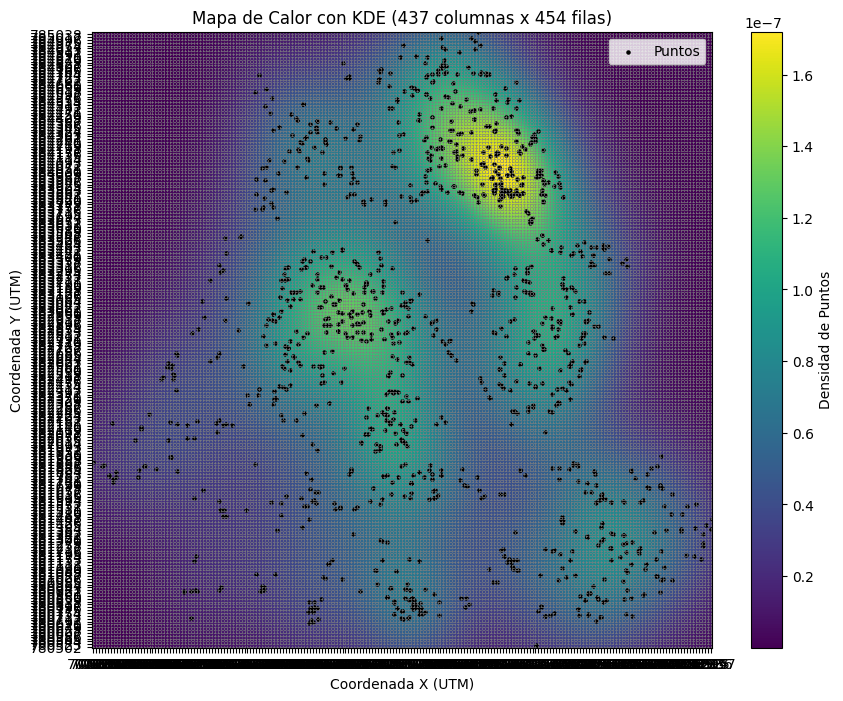

In [66]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Coordenadas UTM mínimas y máximas en los ejes X e Y
xmin = df2['x'].min()
xmax = df2['x'].max()
ymin = df2['y'].min()
ymax = df2['y'].max()

# Resolución deseada en metros
res = 10  # 10 metros en este caso

# Calcula el número de columnas y filas
cols = int((xmax - xmin) / res)
rows = int((ymax - ymin) / res)

# Calcular el KDE
k = kde.gaussian_kde([df2['x'], df2['y']])
xi, yi = np.mgrid[xmin:xmax:cols * 1j, ymin:ymax:rows * 1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar(label='Densidad de Puntos')
plt.scatter(df2['x'], df2['y'], s=5, c='k', label='Puntos')
plt.xlabel('Coordenada X (UTM)')
plt.ylabel('Coordenada Y (UTM)')
plt.title(f'Mapa de Calor con KDE ({cols} columnas x {rows} filas)')

# Agregar el grid
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Ajusta los marcadores en el eje X
# Puedes especificar manualmente los valores que deseas mostrar en el eje X
x_ticks = np.arange(xmin, xmax, 21)
plt.xticks(x_ticks)

# Ajusta los marcadores en el eje Y
y_ticks = np.arange(ymin, ymax, 21)
plt.yticks(y_ticks)


plt.legend()
plt.show()
